In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
input_path_questions="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\QuestionsPosts_2017_2020.csv"
input_path_answers="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\AnswersPosts_2017_2020.csv"

In [2]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [3]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    result = adfuller(timeseries)
    p_value=result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [4]:
import scipy.stats as stats
def is_normal_shapiro(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [5]:
data_q=pd.read_csv(input_path_questions,names=["RowId","CreateDate","Score","ViewCount","LastEditDate","LastActivityDate",
                                               "AnswerCount","CommentCount","FavoritCount","AcceptedAnswerId"],dtype=str)
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId
0,41412454,2017-01-01T00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN
1,41412456,2017-01-01T00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707
2,41412462,2017-01-01T00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN
3,41412463,2017-01-01T00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502
4,41412468,2017-01-01T00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618


In [6]:
data_a=pd.read_csv(input_path_answers,names=["RowId","CreateDate","Score","ViewCount","LastEditDate",
                                             "LastActivityDate","AnswerCount","CommentCount","FavoritCount","ParentId"],dtype=str)
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId
0,41412453,2017-01-01T00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359
1,41412455,2017-01-01T00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413
2,41412458,2017-01-01T00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344
3,41412459,2017-01-01T00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895
4,41412461,2017-01-01T00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388


In [7]:
len(data_q)

7945781

In [8]:
len(data_a)

10177940

In [78]:
data_q['day_date'] = data_q['CreateDate'].dt.date
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,CreateYear,CreateMonth,CreateYearMonth,day_date
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017,1,2017-01-01,2017-01-01
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017,1,2017-01-01,2017-01-01
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017,1,2017-01-01,2017-01-01
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017,1,2017-01-01,2017-01-01
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017,1,2017-01-01,2017-01-01


In [79]:
data_a['day_date'] = data_a['CreateDate'].dt.date
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,CreateYear,CreateMonth,CreateYearMonth,day_date
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017,1,2017-01-01,2017-01-01
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017,1,2017-01-01,2017-01-01
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017,1,2017-01-01,2017-01-01
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017,1,2017-01-01,2017-01-01
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017,1,2017-01-01,2017-01-01


In [80]:
ques_daily=pd.DataFrame(data_q[["RowId", "day_date"]])
ques_daily.head()

,RowId,day_date
0,41412454,2017-01-01
1,41412456,2017-01-01
2,41412462,2017-01-01
3,41412463,2017-01-01
4,41412468,2017-01-01


In [81]:
ans_daily=pd.DataFrame(data_a[["RowId", "day_date"]])
ans_daily.head()

,RowId,day_date
0,41412453,2017-01-01
1,41412455,2017-01-01
2,41412458,2017-01-01
3,41412459,2017-01-01
4,41412461,2017-01-01


In [82]:
ques_daily_grp=ques_daily.groupby(by=['day_date']).size().reset_index(name='counts')
ques_daily_grp.head()

,day_date,counts
0,2017-01-01,2376
1,2017-01-02,4657
2,2017-01-03,6175
3,2017-01-04,6807
4,2017-01-05,7043


In [83]:
ans_daily_grp=ans_daily.groupby(by=['day_date']).size().reset_index(name='counts')
ans_daily_grp.head()

,day_date,counts
0,2017-01-01,3320
1,2017-01-02,6733
2,2017-01-03,9003
3,2017-01-04,9545
4,2017-01-05,9763


In [84]:
ques_daily_grp['day_date']=pd.to_datetime(ques_daily_grp["day_date"])

In [85]:
ans_daily_grp['day_date']=pd.to_datetime(ans_daily_grp["day_date"])

Text(0, 0.5, '#Questions')

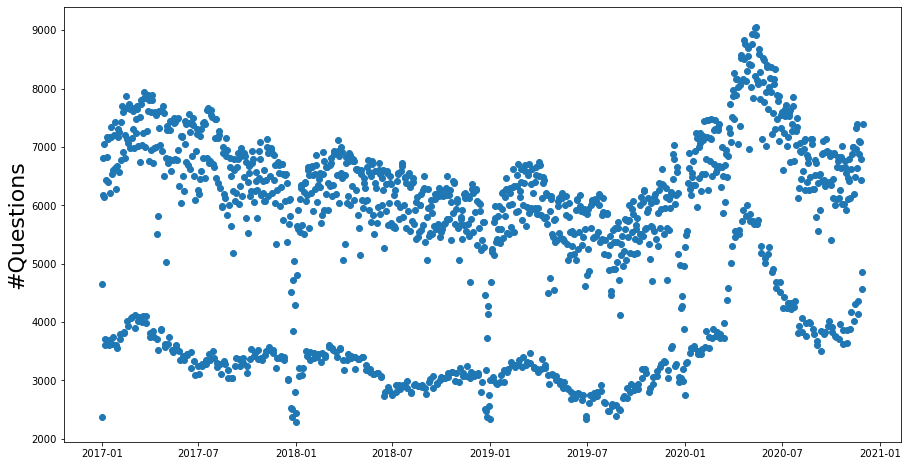

In [117]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ques_daily_grp['day_date'],ques_daily_grp['counts'])
plt.ylabel('#Questions',fontsize=22)

Text(0, 0.5, '#Answers')

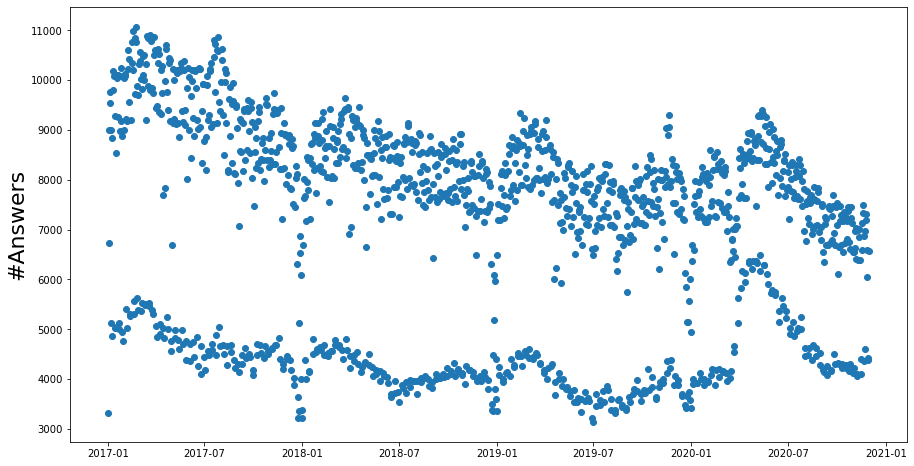

In [118]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ans_daily_grp['day_date'],ans_daily_grp['counts'])
plt.ylabel('#Answers',fontsize=22)

In [89]:
kpss_test(ques_daily_grp['counts'])

KPSS Statistic: 0.7998045467835719
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [90]:
adf_test(ques_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.384224
p-value: 0.146239
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is not stationary


In [91]:
kpss_test(ans_daily_grp['counts'])

KPSS Statistic: 2.616981875148285
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [92]:
adf_test(ans_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.911937
p-value: 0.043977
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is stationary


In [93]:
ques_daily_grp['count_delta'] = ques_daily_grp['counts'].diff()
ques_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,2376,NaN
1,2017-01-02,4657,2281.0
2,2017-01-03,6175,1518.0
3,2017-01-04,6807,632.0
4,2017-01-05,7043,236.0


In [94]:
ans_daily_grp['count_delta'] = ans_daily_grp['counts'].diff()
ans_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,3320,NaN
1,2017-01-02,6733,3413.0
2,2017-01-03,9003,2270.0
3,2017-01-04,9545,542.0
4,2017-01-05,9763,218.0


In [95]:
ques_daily_grp_delta_notna = ques_daily_grp[ques_daily_grp['count_delta'].notna()]
len(ques_daily_grp_delta_notna)

1429

In [96]:
ans_daily_grp_delta_notna = ans_daily_grp[ans_daily_grp['count_delta'].notna()]
len(ans_daily_grp_delta_notna)

1429

Text(0, 0.5, 'Delta on #Questions')

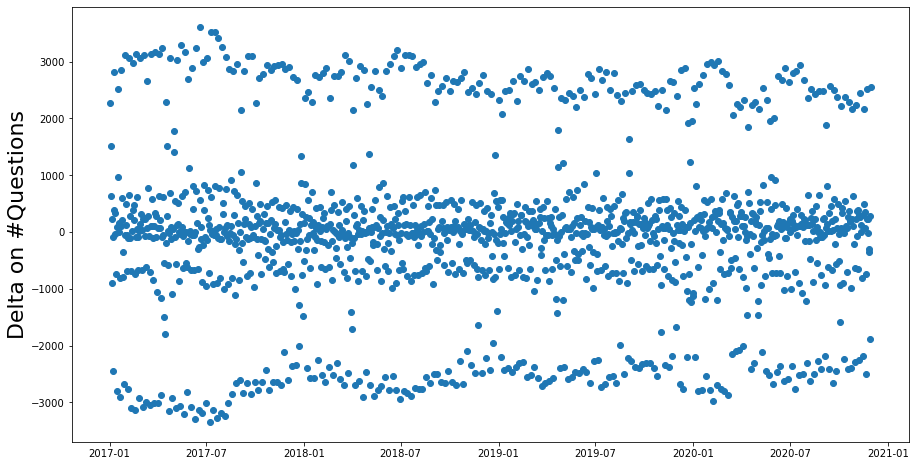

In [113]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ques_daily_grp_delta_notna['day_date'],ques_daily_grp_delta_notna['count_delta'])
plt.ylabel('Delta on #Questions',fontsize=22)

Text(0, 0.5, 'Delta on #Answers')

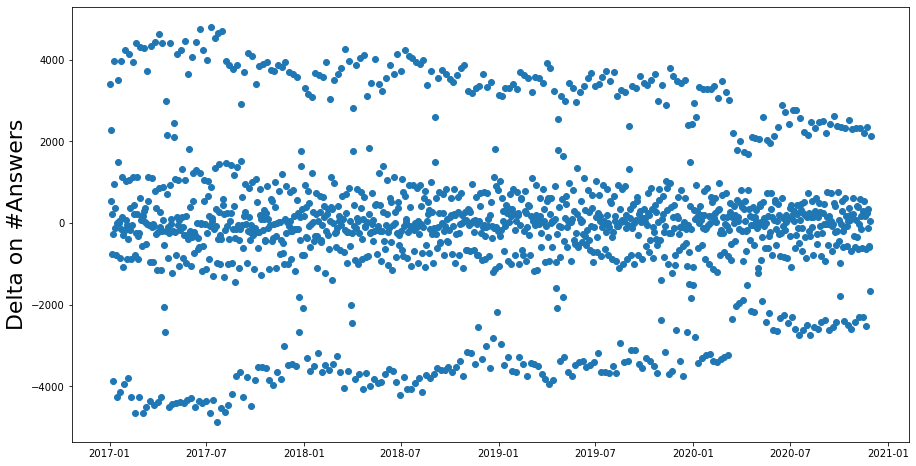

In [114]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(ans_daily_grp_delta_notna['day_date'],ans_daily_grp_delta_notna['count_delta'])
plt.ylabel('Delta on #Answers',fontsize=22)

In [103]:
is_normal_shapiro(ques_daily_grp_delta_notna['count_delta'])

Statistics=0.920, p=0.000
Sample does not look Gaussian (reject H0)


In [104]:
is_normal_shapiro(ans_daily_grp_delta_notna['count_delta'])

Statistics=0.929, p=0.000
Sample does not look Gaussian (reject H0)


In [105]:
ques_daily_grp_delta_notna_17_19=ques_daily_grp_delta_notna[ques_daily_grp_delta_notna['day_date']<'2020-01-01']
len(ques_daily_grp_delta_notna_17_19)

1094

In [106]:
ans_daily_grp_delta_notna_17_19=ans_daily_grp_delta_notna[ans_daily_grp_delta_notna['day_date']<'2020-01-01']
len(ans_daily_grp_delta_notna_17_19)

1094

In [109]:
ques_daily_grp_delta_notna_20=ques_daily_grp_delta_notna[ques_daily_grp_delta_notna['day_date']>='2020-01-01']
len(ques_daily_grp_delta_notna_20)

335

In [108]:
ans_daily_grp_delta_notna_20=ans_daily_grp_delta_notna[ans_daily_grp_delta_notna['day_date']>='2020-01-01']
len(ans_daily_grp_delta_notna_20)

335

In [110]:
def do_meanwhit(df1,df2):
    stat, p = stats.mannwhitneyu(df1['count_delta'], df2['count_delta'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [111]:
do_meanwhit(ques_daily_grp_delta_notna_17_19,ques_daily_grp_delta_notna_20)

Statistics=176882.000, p=0.168
Same distribution (fail to reject H0)


In [112]:
do_meanwhit(ans_daily_grp_delta_notna_17_19,ans_daily_grp_delta_notna_20)

Statistics=180304.500, p=0.328
Same distribution (fail to reject H0)


RQ3

In [120]:
ques_daily_grp_delta_notna_17=ques_daily_grp_delta_notna[(ques_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                           & (ques_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(ques_daily_grp_delta_notna_17)

364

In [121]:
ques_daily_grp_delta_notna_18=ques_daily_grp_delta_notna[(ques_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                           & (ques_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(ques_daily_grp_delta_notna_18)

365

In [122]:
ques_daily_grp_delta_notna_19=ques_daily_grp_delta_notna[(ques_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                           & (ques_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(ques_daily_grp_delta_notna_19)

365

In [123]:
do_meanwhit(ques_daily_grp_delta_notna_17,ques_daily_grp_delta_notna_20)

Statistics=58785.000, p=0.206
Same distribution (fail to reject H0)


In [124]:
do_meanwhit(ques_daily_grp_delta_notna_18,ques_daily_grp_delta_notna_20)

Statistics=58525.000, p=0.164
Same distribution (fail to reject H0)


In [125]:
do_meanwhit(ques_daily_grp_delta_notna_19,ques_daily_grp_delta_notna_20)

Statistics=59572.000, p=0.279
Same distribution (fail to reject H0)


In [126]:
ans_daily_grp_delta_notna_17=ans_daily_grp_delta_notna[(ans_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                           & (ans_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(ans_daily_grp_delta_notna_17)

364

In [127]:
ans_daily_grp_delta_notna_18=ans_daily_grp_delta_notna[(ans_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                           & (ans_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(ans_daily_grp_delta_notna_18)

365

In [128]:
ans_daily_grp_delta_notna_19=ans_daily_grp_delta_notna[(ans_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                           & (ans_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(ans_daily_grp_delta_notna_19)

365

In [129]:
do_meanwhit(ans_daily_grp_delta_notna_17,ans_daily_grp_delta_notna_20)

Statistics=59411.500, p=0.280
Same distribution (fail to reject H0)


In [130]:
do_meanwhit(ans_daily_grp_delta_notna_18,ans_daily_grp_delta_notna_20)

Statistics=60024.000, p=0.339
Same distribution (fail to reject H0)


In [131]:
do_meanwhit(ans_daily_grp_delta_notna_19,ans_daily_grp_delta_notna_20)

Statistics=60869.000, p=0.460
Same distribution (fail to reject H0)


In [9]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
#     print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
#     print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
#     print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
#     print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
#     print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
#     print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [10]:
yearly_monthly_ques=getYearlyMonthlyCreation(data_q)

In [11]:
yearly_monthly_ans=getYearlyMonthlyCreation(data_a)

In [12]:
yearly_monthly_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CreateYearMonth  47 non-null     datetime64[ns]
 1   counts           47 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 880.0 bytes


In [13]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

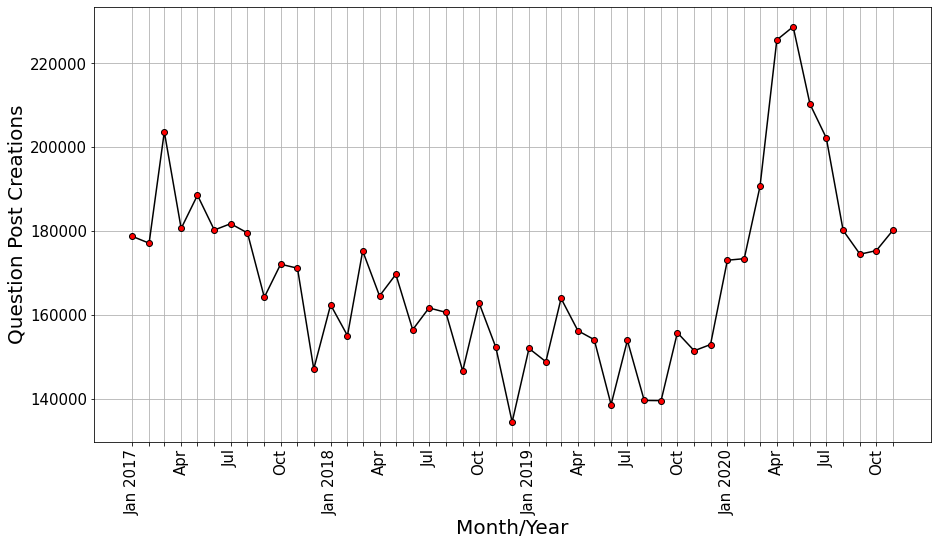

In [14]:
# yearly_monthly_ques.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_ques['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Question Post Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_QuestionsYearltMonthlyPlot.pdf',bbox_inches='tight')
# plt.ylabel('Question Post Creations')

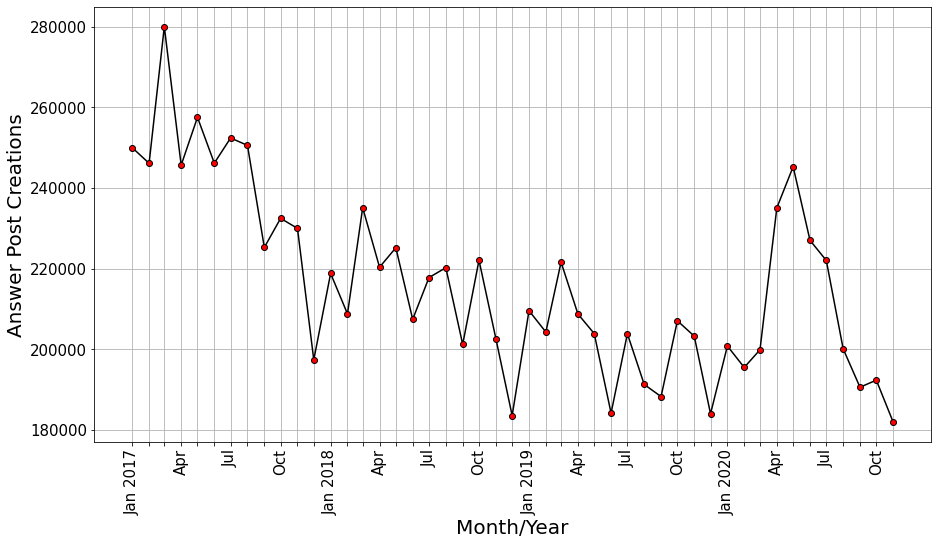

In [15]:
# yearly_monthly_ans.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Answer Post Creations')

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_ans['CreateYearMonth'],yearly_monthly_ans['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_ans['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Answer Post Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_AnswersYearltMonthlyPlot.pdf',bbox_inches='tight')

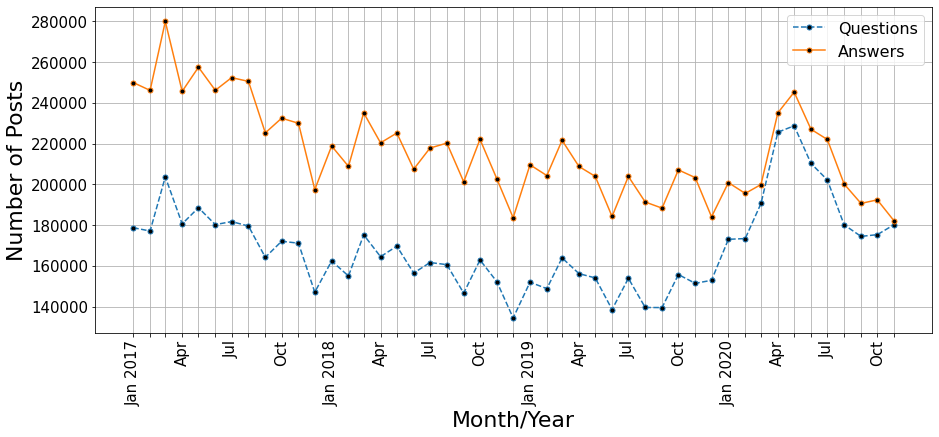

In [17]:
fig, ax = plt.subplots(figsize=(15,6))


lbl="Questions"
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['counts'],linestyle='dashed',marker='.',
         markerfacecolor='black',markersize=10,label=lbl)

lbl="Answers"
plt.plot(yearly_monthly_ans['CreateYearMonth'],yearly_monthly_ans['counts'],marker='.',markerfacecolor='black',
         markersize=10,label=lbl)
#     group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.legend(loc="upper right",prop={'size': 16})
plt.xticks(yearly_monthly_ques['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Posts',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_QuestionsAnswersYearlyMonthly.pdf',bbox_inches='tight')

In [21]:
def fit_reg_line(df,ticks,date_column,count_column):
    x = np.arange(df[date_column].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
    fit = np.polyfit(x, df[count_column], 1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize=(15,8))
    plt.plot(df[date_column], fit_fn(x), 'k-')
    plt.scatter(df[date_column],df[count_column])
    plt.xticks(df[date_column], ticks,fontsize=15,rotation=90)
    plt.show()

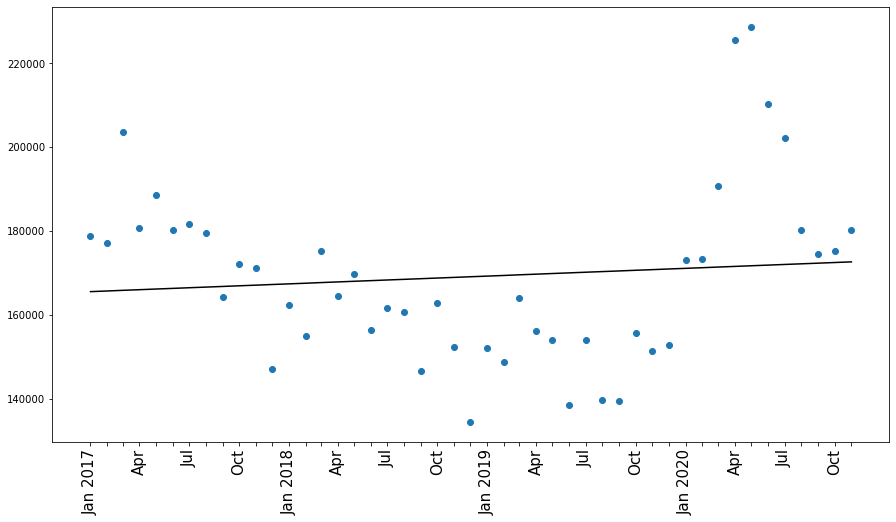

In [22]:
fit_reg_line(yearly_monthly_ques,months_xticks,'CreateYearMonth','counts')

In [ ]:
fit_reg_line(yearly_monthly_ques,months_xticks,'CreateYearMonth','counts')

In [68]:
kpss_test(yearly_monthly_ques['counts'])

KPSS Statistic: 0.14450547223864524
p-value: 0.1
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [69]:
adf_test(yearly_monthly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.273621
p-value: 0.180617
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Result: The series is not stationary


In [70]:
yearly_monthly_ques['count_delta'] = yearly_monthly_ques['counts'].diff()

In [72]:
yearly_monthly_ques[1:]

,CreateYearMonth,counts,count_delta
1,2017-02-01,177073,-1631.0
2,2017-03-01,203651,26578.0
3,2017-04-01,180589,-23062.0
4,2017-05-01,188518,7929.0
5,2017-06-01,180215,-8303.0
6,2017-07-01,181717,1502.0
7,2017-08-01,179523,-2194.0
8,2017-09-01,164161,-15362.0
9,2017-10-01,172049,7888.0
10,2017-11-01,171104,-945.0


In [77]:
stats.ttest_1samp(yearly_monthly_ques[36:]['count_delta'],yearly_monthly_ques[1:36]['count_delta'].mean())

Ttest_1sampResult(statistic=0.6366841686747942, pvalue=0.5386310033930255)

In [76]:
yearly_monthly_ques[1:36]

,CreateYearMonth,counts,count_delta
1,2017-02-01,177073,-1631.0
2,2017-03-01,203651,26578.0
3,2017-04-01,180589,-23062.0
4,2017-05-01,188518,7929.0
5,2017-06-01,180215,-8303.0
6,2017-07-01,181717,1502.0
7,2017-08-01,179523,-2194.0
8,2017-09-01,164161,-15362.0
9,2017-10-01,172049,7888.0
10,2017-11-01,171104,-945.0


In [73]:
is_normal_shapiro(yearly_monthly_ques['count_delta'])

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [27]:
#df should be monthly yearly data
def to_bimonthly(df):
    d={'counts':'sum'}
    bi_counts=df.groupby(df.index  // 2).agg(d)
    monthYear=df['CreateYearMonth']
#     monthYear['months']=monthYear[::2]
    bi_months = pd.DataFrame({"months":monthYear[::2]}) 
    bi_months.index = np.arange(1, len(bi_months) + 1)
    bi_counts.index=np.arange(1, len(bi_counts) + 1)
    result = pd.concat([bi_months, bi_counts], axis=1)
    result.drop(result.tail(1).index,inplace=True) # drop last row cause we do not have dec data and so it only includes nov and becomes small
    return result

In [132]:
bimonthly_yearly_ques=to_bimonthly(yearly_monthly_ques)
bimonthly_yearly_ques

,months,counts
1,2017-01-01,355777
2,2017-03-01,384240
3,2017-05-01,368733
4,2017-07-01,361240
5,2017-09-01,336210
6,2017-11-01,318151
7,2018-01-01,317361
8,2018-03-01,339698
9,2018-05-01,326061
10,2018-07-01,322184


In [133]:
bimonthly_yearly_ans=to_bimonthly(yearly_monthly_ans)
bimonthly_yearly_ans

,months,counts
1,2017-01-01,496078
2,2017-03-01,525600
3,2017-05-01,503652
4,2017-07-01,502928
5,2017-09-01,457735
6,2017-11-01,427403
7,2018-01-01,427628
8,2018-03-01,455467
9,2018-05-01,432631
10,2018-07-01,438045


In [134]:
#remove nov/dec 2020 cause we do not have dec data
bi_ticks=['Jan/Feb 2017','March/April 2017','May/June 2017','July/Aug 2017','Sept/Oct 2017','Nov/Dec 2017','Jan/Feb 2018','March/April 2018','May/June 2018','July/Aug 2018','Sept/Oct 2018','Nov/Dec 2018',
    'Jan/Feb 2019','March/April 2019','May/June 2019','July/Aug 2019','Sept/Oct 2019','Nov/Dec 2019','Jan/Feb 2020','March/April 2020','May/June 2020','July/Aug 2020','Sept/Oct 2020']

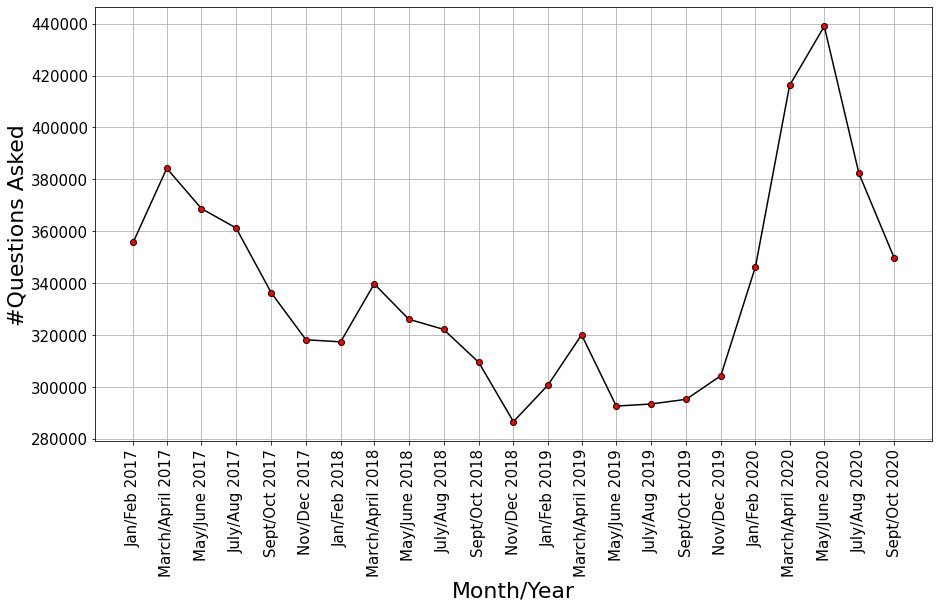

In [135]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ques['months'],bimonthly_yearly_ques['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ques['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Questions Asked',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

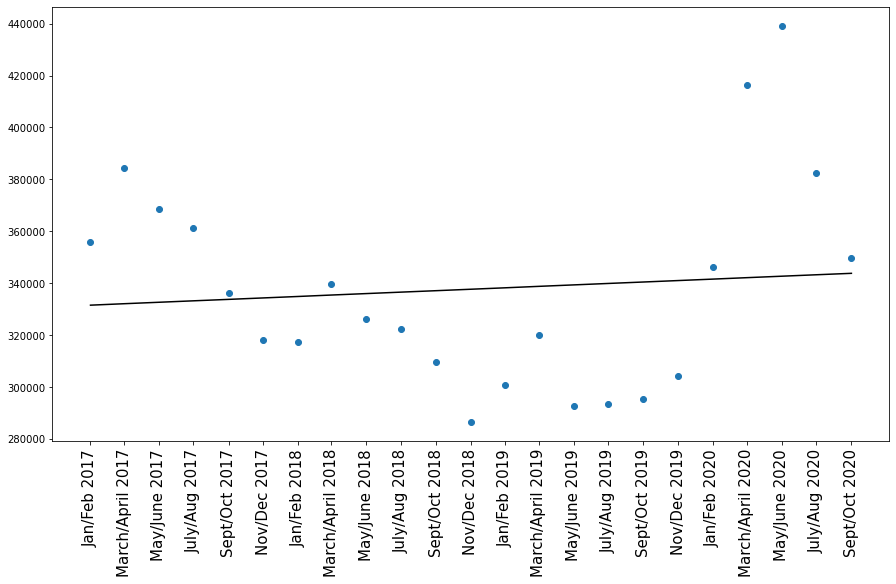

In [31]:
fit_reg_line(bimonthly_yearly_ques,bi_ticks,'months','counts')

In [149]:
kpss_test(bimonthly_yearly_ques['counts'])

KPSS Statistic: 0.16127569559618782
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [150]:
adf_test(bimonthly_yearly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -3.397108
p-value: 0.011058
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Result: The series is stationary


In [147]:
bimonthly_yearly_ques['counts'].mean()

337633.1304347826

In [148]:
bimonthly_yearly_ques['counts'].std()

40353.77710642389

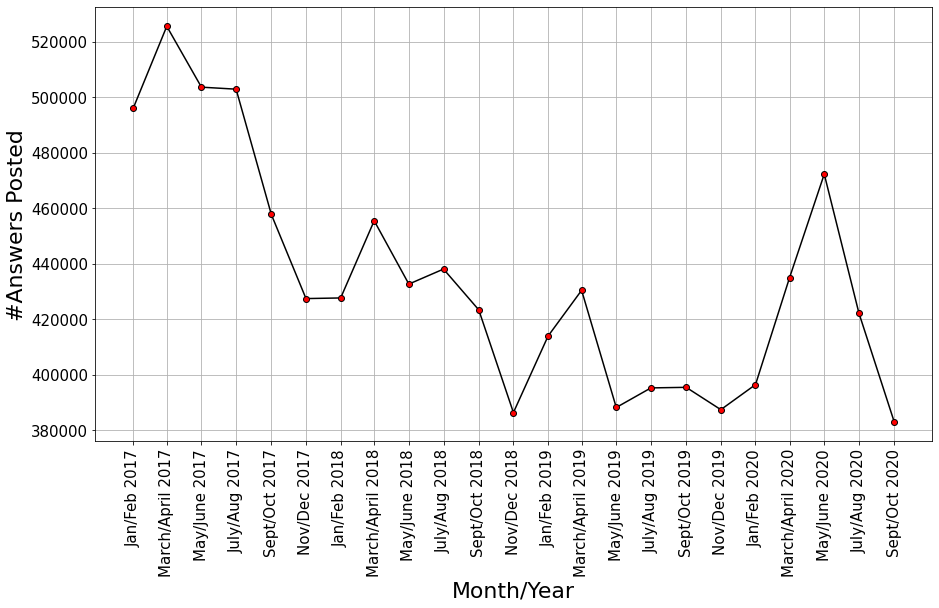

In [136]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ans['months'],bimonthly_yearly_ans['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ans['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Answers Posted',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

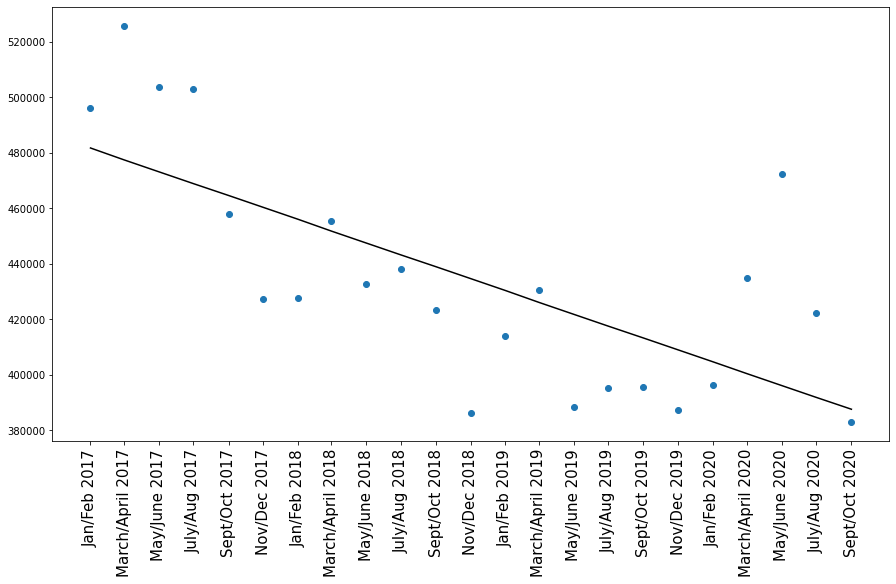

In [34]:
fit_reg_line(bimonthly_yearly_ans,bi_ticks,'months','counts')

In [137]:
kpss_test(bimonthly_yearly_ques['counts'])

KPSS Statistic: 0.16127569559618782
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [138]:
adf_test(bimonthly_yearly_ques['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -3.397108
p-value: 0.011058
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Result: The series is stationary


In [139]:
is_normal_shapiro(bimonthly_yearly_ques['counts'])

Statistics=0.926, p=0.091
Sample looks Gaussian (fail to reject H0)


In [151]:
bimonthly_yearly_ques['count_delta'] = bimonthly_yearly_ques['counts'].diff()
bimonthly_yearly_ques

,months,counts,count_delta
1,2017-01-01,355777,NaN
2,2017-03-01,384240,28463.0
3,2017-05-01,368733,-15507.0
4,2017-07-01,361240,-7493.0
5,2017-09-01,336210,-25030.0
6,2017-11-01,318151,-18059.0
7,2018-01-01,317361,-790.0
8,2018-03-01,339698,22337.0
9,2018-05-01,326061,-13637.0
10,2018-07-01,322184,-3877.0


In [152]:
bimonthly_yearly_ques_deltaclean=bimonthly_yearly_ques[1:]
bimonthly_yearly_ques_deltaclean.index-=1
bimonthly_yearly_ques_deltaclean

,months,counts,count_delta
1,2017-03-01,384240,28463.0
2,2017-05-01,368733,-15507.0
3,2017-07-01,361240,-7493.0
4,2017-09-01,336210,-25030.0
5,2017-11-01,318151,-18059.0
6,2018-01-01,317361,-790.0
7,2018-03-01,339698,22337.0
8,2018-05-01,326061,-13637.0
9,2018-07-01,322184,-3877.0
10,2018-09-01,309444,-12740.0


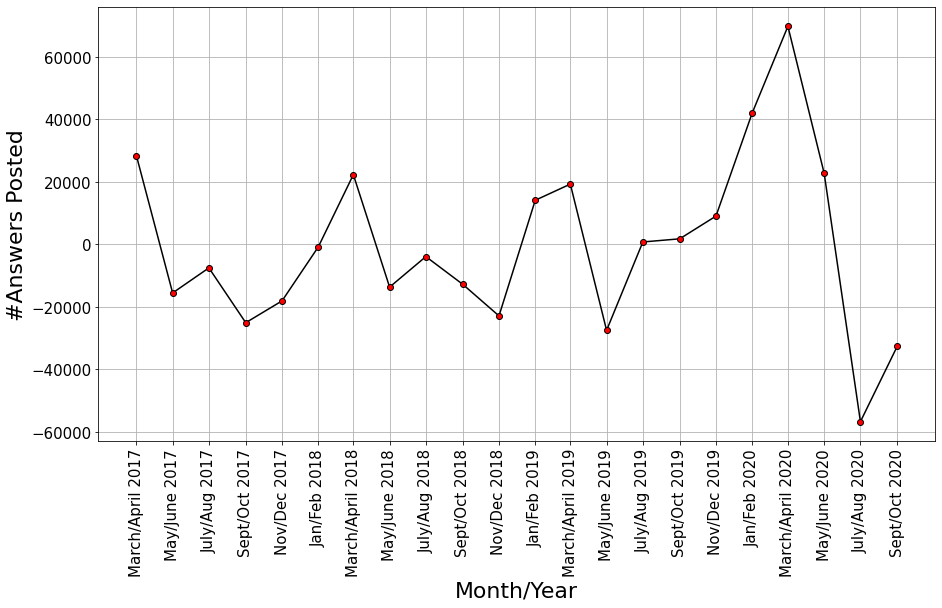

In [153]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ques_deltaclean['months'],bimonthly_yearly_ques_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ques_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Answers Posted',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

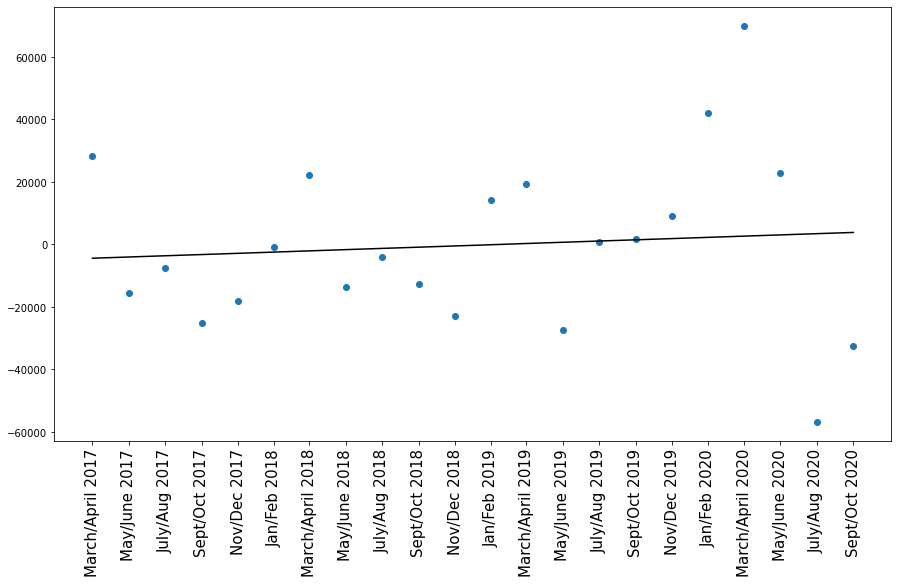

In [154]:
fit_reg_line(bimonthly_yearly_ques_deltaclean,bi_ticks[1:],'months','count_delta')

In [155]:
bimonthly_yearly_ques_deltaclean['count_delta'].mean()

-274.59090909090907

In [156]:
bimonthly_yearly_ques_deltaclean['count_delta'].std()

27858.58348304555

In [142]:
bimonthly_yearly_ans['count_delta'] = bimonthly_yearly_ans['counts'].diff()
bimonthly_yearly_ans

,months,counts,count_delta
1,2017-01-01,496078,NaN
2,2017-03-01,525600,29522.0
3,2017-05-01,503652,-21948.0
4,2017-07-01,502928,-724.0
5,2017-09-01,457735,-45193.0
6,2017-11-01,427403,-30332.0
7,2018-01-01,427628,225.0
8,2018-03-01,455467,27839.0
9,2018-05-01,432631,-22836.0
10,2018-07-01,438045,5414.0


In [146]:
bimonthly_yearly_ans_deltaclean=bimonthly_yearly_ans[1:]
bimonthly_yearly_ans_deltaclean.index-=1
bimonthly_yearly_ans_deltaclean

,months,counts,count_delta
1,2017-03-01,525600,29522.0
2,2017-05-01,503652,-21948.0
3,2017-07-01,502928,-724.0
4,2017-09-01,457735,-45193.0
5,2017-11-01,427403,-30332.0
6,2018-01-01,427628,225.0
7,2018-03-01,455467,27839.0
8,2018-05-01,432631,-22836.0
9,2018-07-01,438045,5414.0
10,2018-09-01,423334,-14711.0


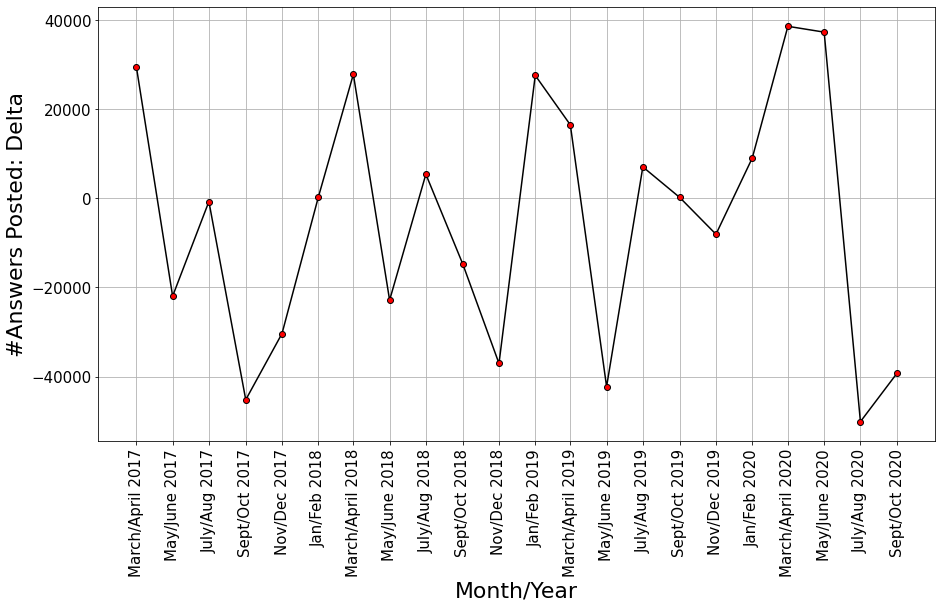

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_ans_deltaclean['months'],bimonthly_yearly_ans_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_ans_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Answers Posted: Delta',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

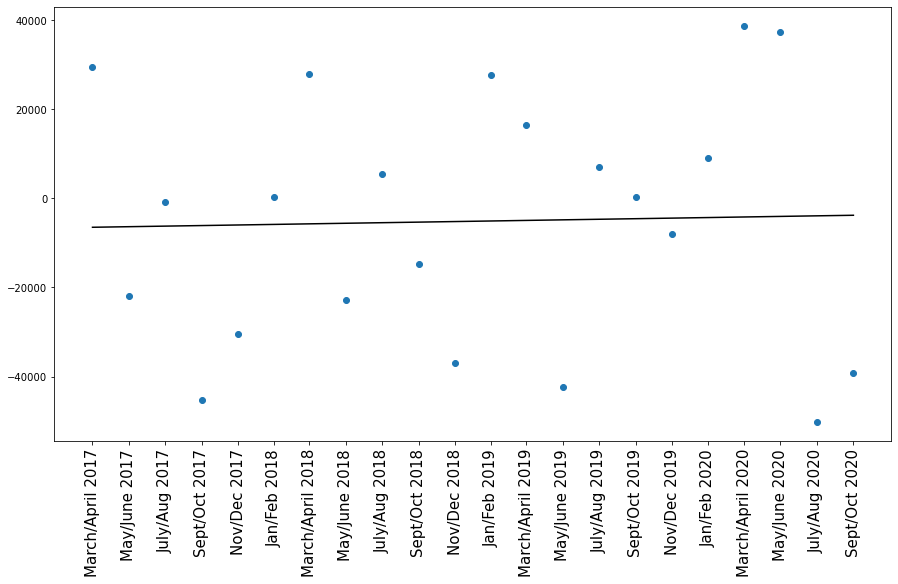

In [43]:
fit_reg_line(bimonthly_yearly_ans_deltaclean,bi_ticks[1:],'months','count_delta')

In [157]:
bimonthly_yearly_ans_deltaclean['count_delta'].mean()

-5139.363636363636

In [158]:
bimonthly_yearly_ans_deltaclean['count_delta'].std()

28108.31638593724

In [63]:
stats.ttest_1samp(bimonthly_yearly_ans[18:]['count_delta'],bimonthly_yearly_ans[1:18]['count_delta'].mean())

Ttest_1sampResult(statistic=0.2955145947341035, pvalue=0.7823060673271433)

# Stats tests

Questions

In [ ]:
yearly_monthly_ques['count_delta'] = yearly_monthly_ques['counts'].diff().shift(-1).abs()
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['count_delta'])


In [ ]:
yearly_monthly_ques['count_delta']

In [ ]:
yearly_monthly_ques_dec= yearly_monthly_ques['CreateYearMonth'].isin(['2017-12-01', '2018-12-01', '2019-12-01'])
yearly_monthly_ques_no_dec=yearly_monthly_ques[~yearly_monthly_ques_dec]

In [ ]:
yearly_monthly_ques_no_dec

In [ ]:
yearly_monthly_ques_nov= yearly_monthly_ques_no_dec['CreateYearMonth'].isin(['2017-11-01', '2018-11-01', '2019-11-01','2020-11-01'])
yearly_monthly_ques_no_dec_no_nov=yearly_monthly_ques_no_dec[~yearly_monthly_ques_nov]

In [ ]:
yearly_monthly_ques_no_dec_no_nov

In [ ]:
yearly_monthly_ques_no_dec_17=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2017-01-01') & (yearly_monthly_ques_no_dec['CreateYearMonth']<'2018-01-01')]
np.var(yearly_monthly_ques_no_dec_17['counts'])

In [ ]:
yearly_monthly_ques_no_dec_18=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2018-01-01') & (yearly_monthly_ques_no_dec['CreateYearMonth']<'2019-01-01')]
np.var(yearly_monthly_ques_no_dec_18['counts'])

In [ ]:
yearly_monthly_ques_no_dec_19=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2019-01-01') & (yearly_monthly_ques_no_dec['CreateYearMonth']<'2020-01-01')]
np.var(yearly_monthly_ques_no_dec_19['counts'])

In [ ]:
yearly_monthly_ques_no_dec_20=yearly_monthly_ques_no_dec[(yearly_monthly_ques_no_dec['CreateYearMonth']>='2020-01-01')]
np.var(yearly_monthly_ques_no_dec_20['counts'])

In [ ]:
kpss_test(yearly_monthly_ques['counts'])

In [ ]:
adf_test(yearly_monthly_ques['counts'])

In [ ]:
kpss_test(yearly_monthly_ques['count_delta'].head(46))

In [ ]:
adf_test(yearly_monthly_ques['count_delta'].head(46))

In [ ]:
yearly_monthly_grp_dec= yearly_monthly_grp['CreateYearMonth'].isin(['2017-12-01', '2018-12-01', '2019-12-01'])
yearly_monthly_grp_no_dec=yearly_monthly_grp[~yearly_monthly_grp_dec]

In [ ]:
kpss_test(yearly_monthly_ques_no_dec['count_delta'])

In [ ]:
kpss_test(yearly_monthly_ques_no_dec['count_delta'])

In [ ]:
yearly_monthly_ques['count_delta'] = yearly_monthly_ques['counts'].diff().abs()
yearly_monthly_ques

In [ ]:
yearly_monthly_ques_17=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2017-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2018-01-01')]
np.var(yearly_monthly_ques_17['counts'])

In [ ]:
yearly_monthly_ques_18=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2018-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2019-01-01')]
np.var(yearly_monthly_ques_18['counts'])

In [ ]:
yearly_monthly_ques_19=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2019-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2020-01-01')]
np.var(yearly_monthly_ques_19['counts'])

In [ ]:
yearly_monthly_ques_20=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2020-01-01')]
np.var(yearly_monthly_ques_20['counts'])

In [ ]:
yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']=='2020-03-01')]

In [ ]:
yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']=='2020-04-01')]

In [ ]:
yearly_monthly_ans[(yearly_monthly_ans['CreateYearMonth']=='2020-03-01')]

In [ ]:
yearly_monthly_ans[(yearly_monthly_ans['CreateYearMonth']=='2020-04-01')]

In [ ]:
kpss_test(yearly_monthly_ques_17['counts'])
kpss_test(yearly_monthly_ques_18['counts'])
kpss_test(yearly_monthly_ques_19['counts'])
kpss_test(yearly_monthly_ques_20['counts'])

In [ ]:
adf_test(yearly_monthly_ques_17['counts'])
adf_test(yearly_monthly_ques_18['counts'])
adf_test(yearly_monthly_ques_19['counts'])
adf_test(yearly_monthly_ques_20['counts'])

In [ ]:
data_q.isnull().sum(axis = 0)

In [ ]:
data_a.isnull().sum(axis = 0)

In [ ]:
ques_with_ans=data_q[data_q['AcceptedAnswerId'].notna()]

In [ ]:
print(len(data_q))
print(len(ques_with_ans))
print(ques_with_ans.isnull().sum(axis = 0))

In [ ]:
ques_no_ans=data_q[data_q['AcceptedAnswerId'].isnull()]

In [ ]:
print(len(ques_no_ans))
print(ques_no_ans.isnull().sum(axis = 0))

# Number of questions not getting any answer over time

In [ ]:
yearly_monthly_ques_no_ans=getYearlyMonthlyCreation(ques_no_ans)
print(yearly_monthly_ques_no_ans.head())

In [ ]:
print(len(yearly_monthly_ques_no_ans))
print(len(yearly_monthly_ques))

In [ ]:
ques_ans_percent=pd.merge(yearly_monthly_ques_no_ans,yearly_monthly_ques,how='inner', 
                          on= 'CreateYearMonth')
ques_ans_percent.head()

In [ ]:
len(ques_ans_percent)

In [ ]:
ques_ans_percent['PercentUnanswered']=ques_ans_percent['counts_x']/ques_ans_percent['counts_y']
ques_ans_percent['PercentUnanswered']=ques_ans_percent['PercentUnanswered']*100 #convert to percentage from fraction

In [ ]:
print(len(ques_ans_percent))
print(ques_ans_percent.head())

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_percent['CreateYearMonth'],ques_ans_percent['PercentUnanswered'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_percent['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('% Unanswered',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_NoAnswertMonthlyPlot.pdf',bbox_inches='tight')

# ques_ans_percent.plot(x='CreateYearMonth',y='PercentUnanswered',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('% Unanswered')

# Avg Response Time

In [ ]:
ques_ans=pd.merge(ques_with_ans,data_a,how='inner', left_on= ['RowId'],right_on= ['ParentId'])

In [ ]:
ques_ans.head()

In [ ]:
print(ques_ans.isnull().sum(axis = 0))

In [ ]:
#drop the 770 rows that have null values for answers (possibly cause of data incompleteness)
# ques_ans.dropna()

In [ ]:
ques_ans=ques_ans.drop(columns=["Score_x","ViewCount_x","LastEditDate_x","LastActivityDate_x","AnswerCount_x",
                                "CommentCount_x","FavoritCount_x"])
ques_ans.head()

# ques_ans.drop("ViewCount_y")
# ques_ans.drop("LastEditDate_y")
# ques_ans.drop("LastActivityDate_y")

In [ ]:
ques_ans=ques_ans.drop(columns=["Score_y","ViewCount_y","LastEditDate_y","LastActivityDate_y","AnswerCount_y",
                                "CommentCount_y","FavoritCount_y"])
ques_ans.head()

In [ ]:
ques_ans = ques_ans.rename(columns={'CreateDate_x': 'CreateDateQues', 'CreateDate_y': 'CreateDateAns',
                                    'RowId_x':'QuestionId','RowId_y':'AnswerId'})

In [ ]:
ques_ans.head()

In [ ]:
ques_ans['CreateDateQues'] = pd.to_datetime(ques_ans['CreateDateQues'])
ques_ans['CreateDateAns'] = pd.to_datetime(ques_ans['CreateDateAns'])
ques_ans.head()

In [ ]:
ques_ans['ResponseTime']=(ques_ans['CreateDateAns']-ques_ans['CreateDateQues'])
ques_ans.head()

In [ ]:
ques_ans['ResponseTimeSec']=ques_ans['ResponseTime'].dt.total_seconds()
ques_ans.head()

In [ ]:
print(len(ques_ans[ques_ans['ResponseTimeSec']<0]))
print(len(ques_ans))

In [ ]:
ques_ans=ques_ans[ques_ans['ResponseTimeSec']>=0]

In [ ]:
print(len(ques_ans[ques_ans['ResponseTimeSec']<0]))
print(len(ques_ans))

In [ ]:
ques_ans_grp=ques_ans.groupby(['QuestionId','CreateDateQues'])['ResponseTimeSec'].min().reset_index()
ques_ans_grp.head()

In [ ]:
print(len(ques_ans))
print(len(ques_ans_grp))

In [ ]:
ques_ans_grp["CreateDateQues"] = pd.to_datetime(ques_ans_grp["CreateDateQues"])
#     print(data.head())
ques_ans_grp["CreateYear"]=ques_ans_grp['CreateDateQues'].map(lambda x: x.year)
#     print(data.head())
ques_ans_grp["CreateMonth"]=ques_ans_grp['CreateDateQues'].map(lambda x: x.month)
#     print(data.head())
ques_ans_grp["CreateYearMonth"]=ques_ans_grp["CreateYear"].astype(str) +"-"+ ques_ans_grp["CreateMonth"].astype(str)
#     print(data.head())
ques_ans_grp['CreateYearMonth'] = pd.to_datetime(ques_ans_grp['CreateYearMonth'])
print(ques_ans_grp.head())

In [ ]:
ques_ans_grp["ResponseTimeMin"]=ques_ans_grp['ResponseTimeSec']/60.0
ques_ans_grp["ResponseTimeHr"]=ques_ans_grp['ResponseTimeMin']/60.0
ques_ans_grp.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.tick_params(axis ='both', which ='major',  
               labelsize = 26, pad = 12,  ) 
plt.tight_layout()
myplot=sb.stripplot(x=ques_ans_grp['CreateYearMonth'], y=ques_ans_grp['ResponseTimeHr'],palette=sb.color_palette("dark", n_colors=12))
ax.set_xticklabels(months_xticks, minor=False)

# plt.xticks(fontsize=15,rotation=90)
# plt.yticks(fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Response Time (Hr)',fontsize=32)
# plt.grid()
plt.xlabel('Month/Year',fontsize=32)
plt.show()
fig = myplot.get_figure()
# fig.savefig(...)
fig.savefig('figs/SO_ResponseTime.png',bbox_inches='tight')


In [ ]:
ques_ans_grp_2019_2020=ques_ans_grp[(ques_ans_grp["CreateYear"]==2019) | (ques_ans_grp["CreateYear"]==2020) ]
len(ques_ans_grp_2019_2020)
ques_ans_grp_2020=ques_ans_grp[ques_ans_grp["CreateYear"]==2020]
len(ques_ans_grp_2020)

In [ ]:
months_xticks_2020=['Jan 2020','','','Apr','','','Jul','','','Oct','']
fig, ax = plt.subplots(figsize=(20, 15))
ax.tick_params(axis ='both', which ='major',  
               labelsize = 26, pad = 12,  ) 
plt.tight_layout()
myplot=sb.stripplot(x=ques_ans_grp_2020['CreateYearMonth'], y=ques_ans_grp_2020['ResponseTimeHr'],
             palette=sb.color_palette("dark", n_colors=12))
ax.set_xticklabels(months_xticks_2020, minor=False)

# plt.xticks(fontsize=15,rotation=90)
# plt.yticks(fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Response Time (Hr)',fontsize=32)
# plt.grid()
plt.xlabel('Month/Year',fontsize=32)
plt.show()
fig = myplot.get_figure()
fig.savefig('figs/SO_ResponseTime2020.png',bbox_inches='tight')

In [ ]:
ques_ans_yearly_monthly = pd.DataFrame(ques_ans_grp[["QuestionId", "CreateYearMonth","ResponseTimeMin"]])
#     print(creation_yearly_monthly.head())
ques_ans_yearly_monthly_mean=ques_ans_yearly_monthly.groupby(['CreateYearMonth'])['ResponseTimeMin'].mean().reset_index()
# ques_ans_yearly_monthly_mean['ResponseTimeSec']=ques_ans_yearly_monthly_mean['ResponseTimeSec']/60 #to min
# ques_ans_yearly_monthly_mean['ResponseTimeSec']=ques_ans_yearly_monthly_mean['ResponseTimeSec']/60 #to hr
# ques_ans_yearly_monthly_mean=ques_ans_yearly_monthly_mean.rename(columns={"ResponseTimeSec":"ResponseTimeMin"})
ques_ans_yearly_monthly_mean['ResponseTimeMin']=ques_ans_yearly_monthly_mean['ResponseTimeMin'].astype(int)
ques_ans_yearly_monthly_mean.head()

In [ ]:
ques_ans_yearly_monthly_median=ques_ans_yearly_monthly.groupby(['CreateYearMonth'])['ResponseTimeMin'].median().reset_index()
# ques_ans_yearly_monthly_median['ResponseTimeSec']=ques_ans_yearly_monthly_median['ResponseTimeSec']/60 #to min
# ques_ans_yearly_monthly_median['ResponseTimeSec']=ques_ans_yearly_monthly_median['ResponseTimeSec']/60 #to hr
# ques_ans_yearly_monthly_median=ques_ans_yearly_monthly_median.rename(columns={"ResponseTimeSec":"ResponseTimeMin"})
ques_ans_yearly_monthly_median['ResponseTimeMin']=ques_ans_yearly_monthly_median['ResponseTimeMin'].astype(int)
ques_ans_yearly_monthly_median.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_yearly_monthly_mean['CreateYearMonth'],ques_ans_yearly_monthly_mean['ResponseTimeMin'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_yearly_monthly_mean['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Mean Response Time (Min)',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_MeanResponseTime.pdf',bbox_inches='tight')

# ques_ans_yearly_monthly_mean.plot(x='CreateYearMonth',y='ResponseTimeHr',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Mean Response Time (Hr)')

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_yearly_monthly_median['CreateYearMonth'],ques_ans_yearly_monthly_median['ResponseTimeMin'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_yearly_monthly_median['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Median Response Time (Min)',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_MedianResponseTime.pdf',bbox_inches='tight')

# ques_ans_yearly_monthly_median.plot(x='CreateYearMonth',y='ResponseTimeMin',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Median Response Time (Min)')

# Weekend vs Weekday

In [ ]:
data_q.head()

In [ ]:
data_a.head()

In [ ]:
#Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6
data_q["IsWeekend"]=np.where(((data_q["CreateDate"]).dt.dayofweek) < 5,0,1) #pd.DatetimeIndex(data_q["CreateDate"]).dayofweek
data_a["IsWeekend"]=np.where(((data_a["CreateDate"]).dt.dayofweek) < 5,0,1) #pd.DatetimeIndex(data_q["CreateDate"]).dayofweek

In [ ]:
data_q.head()

In [ ]:
data_a.head()

In [ ]:
data_q["CreateDate"] = pd.to_datetime(data_q["CreateDate"])
data_q["CreateYear"]=data_q['CreateDate'].map(lambda x: x.year)
data_q["CreateMonth"]=data_q['CreateDate'].map(lambda x: x.month)
data_q.head()

In [ ]:
data_a["CreateDate"] = pd.to_datetime(data_a["CreateDate"])
data_a["CreateYear"]=data_a['CreateDate'].map(lambda x: x.year)
data_a["CreateMonth"]=data_a['CreateDate'].map(lambda x: x.month)
data_a.head()

In [ ]:
data_q['CreateYearMonth'] = pd.to_datetime(data_q['CreateYearMonth'])
ques_creation_yearly_monthly_weekend = pd.DataFrame(data_q[["RowId", "CreateYearMonth","IsWeekend"]])
ques_creation_yearly_monthly_weekend.head()

In [ ]:
data_a['CreateYearMonth'] = pd.to_datetime(data_a['CreateYearMonth'])
ans_creation_yearly_monthly_weekend = pd.DataFrame(data_a[["RowId", "CreateYearMonth","IsWeekend"]])
ans_creation_yearly_monthly_weekend.head()

In [ ]:
ques_yearly_monthly_weekend_weekday_grp=ques_creation_yearly_monthly_weekend.groupby(by=['CreateYearMonth','IsWeekend']).size().reset_index(name='counts')
ques_yearly_monthly_weekend_weekday_grp.head()


In [ ]:
ans_yearly_monthly_weekend_weekday_grp=ans_creation_yearly_monthly_weekend.groupby(by=['CreateYearMonth','IsWeekend']).size().reset_index(name='counts')
ans_yearly_monthly_weekend_weekday_grp.head()


In [ ]:
ques_yearly_monthly_weekend_grp=ques_yearly_monthly_weekend_weekday_grp[(ques_yearly_monthly_weekend_weekday_grp["IsWeekend"]==1)]
ques_yearly_monthly_weekend_grp.head()
len(ques_yearly_monthly_weekend_grp)

In [ ]:
ans_yearly_monthly_weekend_grp=ans_yearly_monthly_weekend_weekday_grp[(ans_yearly_monthly_weekend_weekday_grp["IsWeekend"]==1)]
ans_yearly_monthly_weekend_grp.head()
len(ans_yearly_monthly_weekend_grp)

In [ ]:
ques_yearly_monthly_weekday_grp=ques_yearly_monthly_weekend_weekday_grp[(ques_yearly_monthly_weekend_weekday_grp["IsWeekend"]==0)]
ques_yearly_monthly_weekday_grp.head()
len(ques_yearly_monthly_weekday_grp)

In [ ]:
ans_yearly_monthly_weekday_grp=ans_yearly_monthly_weekend_weekday_grp[(ans_yearly_monthly_weekend_weekday_grp["IsWeekend"]==0)]
ans_yearly_monthly_weekday_grp.head()
len(ans_yearly_monthly_weekday_grp)

In [ ]:
ques_yearly_monthly_weekday_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Questions asked in workdays')

In [ ]:
ques_yearly_monthly_weekend_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Questions asked in weekends')

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in ques_yearly_monthly_weekend_weekday_grp.groupby('IsWeekend'):
    if(name==1):
        lbl="Weekend"
        plt.plot(group['CreateYearMonth'],group['counts'],linestyle='dashed',marker='.',markerfacecolor='black'
                 ,markersize=10,label=lbl)
    else:
        lbl="Workday"
        plt.plot(group['CreateYearMonth'],group['counts'],marker='.',markerfacecolor='black',markersize=10,label=lbl)
#     group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.legend(loc='upper right')
plt.xticks(ques_yearly_monthly_weekend_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Questions Asked',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_QuestionsWeekendWeekdayYearlyMonthly.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in ans_yearly_monthly_weekend_weekday_grp.groupby('IsWeekend'):
    if(name==1):
        lbl="Weekend"
        plt.plot(group['CreateYearMonth'],group['counts'],linestyle='dashed',marker='.',markerfacecolor='black',
                 markersize=10,label=lbl)
#         group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
    else:
        lbl="Workday"
        plt.plot(group['CreateYearMonth'],group['counts'],marker='.',markerfacecolor='black',markersize=10,label=lbl)
#         group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.legend(loc='upper right')
plt.xticks(ans_yearly_monthly_weekend_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Answers Posted',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_AnswersWeekendWeekdayYearlyMonthly.pdf',bbox_inches='tight')

In [ ]:
data_q.head()

In [ ]:
len(data_q)

In [ ]:
data_2017=data_q[data_q["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

In [ ]:
data_2018=data_q[data_q["CreateYear"]==2018]
len(data_2018)

In [ ]:
data_2019=data_q[data_q["CreateYear"]==2019]
len(data_2019)

In [ ]:
data_2020=data_q[data_q["CreateYear"]==2020]
len(data_2020)

In [ ]:
data_a.head()

In [ ]:
len(data_a)

In [ ]:
data_2017=data_a[data_a["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

In [ ]:
data_2018=data_a[data_a["CreateYear"]==2018]
len(data_2018)

In [ ]:
data_2019=data_a[data_a["CreateYear"]==2019]
len(data_2019)

In [ ]:
data_2020=data_a[data_a["CreateYear"]==2020]
len(data_2020)